In [1]:
import sympy as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sm.init_printing()

In [3]:
t, s, k, omega, zeta = sm.symbols('t s k, omega, zeta')

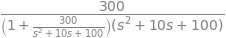

In [4]:
k=3
g= 100*k/(s**2 + 10*s + 100)
g

cr = g/(1+g)
cr

In [5]:
c = sm.inverse_laplace_transform(cr*1/s, s, t)
c

In [6]:
sm.simplify(cr)

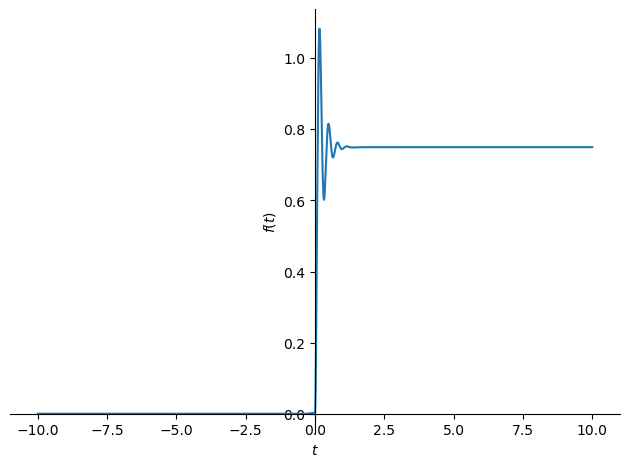

In [7]:
sm.plot(c)

the phase angle is 14.477512185929925 degrees


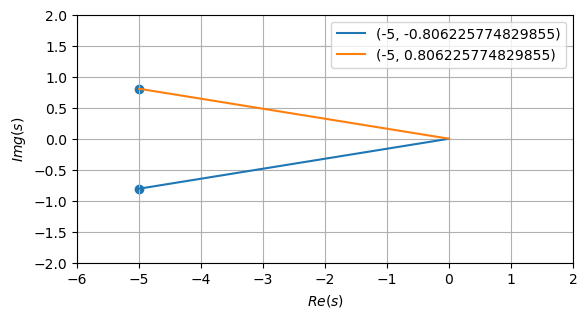

In [35]:
poles = [(-5, -np.sqrt(1-0.35)), (-5, np.sqrt(1-0.35))]
plt.scatter([p[0] for p in poles], [p[1] for p in poles])
plt.plot((-5, 0), (-np.sqrt(1-0.35), 0), label = f"(-5, {-np.sqrt(1-0.35)})")
plt.plot((-5, 0), (np.sqrt(1-0.35), 0), label = f"(-5, {np.sqrt(1-0.35)})")
plt.grid()
plt.xlim(-6, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.legend()
print(f"the phase angle is {90-np.degrees(np.arctan(np.sqrt(1-0.25**2)/0.25))} degrees")
plt.xlabel(r"$Re(s)$")
plt.ylabel(f"$Img(s)$")
plt.savefig("2g.png")

In [9]:
sm.simplify(cr)

In [10]:
w = 20
z = 0.25

loop gain function = $\frac{4}{3}$

In [11]:
T_s = 3/(omega * zeta)
T_s.subs(omega, w).subs(zeta, z)

settling time = $0.6s$

In [12]:
po = 100 * sm.exp(-(sm.pi*zeta)/(sm.sqrt(1-zeta ** 2)))
po.subs(omega, w).subs(zeta, z).evalf()

percent overshoot = $44\%$

In [13]:
T_p = (sm.pi)/(omega * sm.sqrt(1-zeta ** 2))
T_p.subs(omega, w).subs(zeta, z).evalf()

peak time is $0.16s$

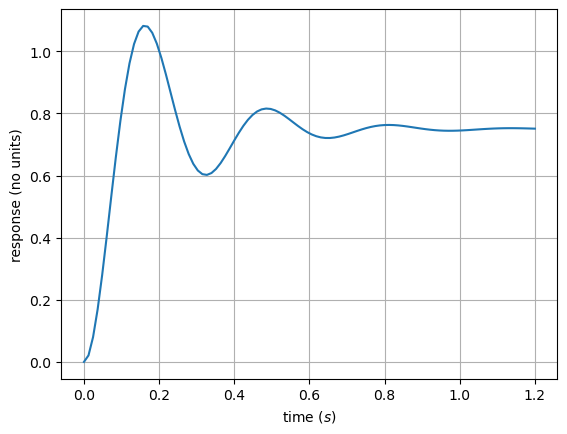

In [31]:
ts = np.linspace(0, 1.2, 100)
plt.plot(ts, [c.subs(t, time).evalf() for time in ts])
plt.grid()
plt.xlabel(r"time ($s$)")
plt.ylabel("response (no units)")
plt.savefig("2f.png")

In [15]:
f = sm.exp(-2*t**3)
f.diff()

In [16]:
f

In [19]:
g_1, g_2, g_3, g_4, h = sm.symbols("G_1, G_2, G_3, G_4, H")

In [21]:
g_b = g_4/g_1
g_a = g_1*g_2 + g_3/g_b
g_a

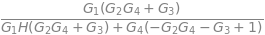

In [27]:
g_c = g_a / (1-g_a*g_b)
(g_c / (1+g_c * h)).simplify()

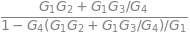

In [28]:
g_c